# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

# Reading the Dataset

In [2]:
df = pd.read_csv('Dataset/Twitter_Data.csv')

In [3]:
df.shape

(162980, 2)

In [4]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# Check for Null values

In [6]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [7]:
# Dropping NULL values
df.dropna(axis = 'rows' , inplace = True)

In [8]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [9]:
# Reseting the index
df = df.reset_index(drop=True)

In [10]:
df.head(150)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
145,thats modi magic ghochu,1.0
146,modi lotus bjp symble become soil every comman...,0.0
147,weak state capacity exacerbated excessive acco...,1.0
148,why not ask them vote for modern india modi wh...,-1.0


# Stemming and Removing Stop Words

In [11]:
# Using Porter Stemmer Algorithm for Stemming
ps = PorterStemmer()

In [12]:
# List that will store the sentences after stemming and removing stop words
corpus = []

In [13]:
# Stemming and removing Stop words
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['clean_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
corpus

['modi promis minimum govern maximum govern expect begin difficult job reform state take year get justic state busi exit psu templ',
 'talk nonsens continu drama vote modi',
 'say vote modi welcom bjp told rahul main campaign modi think modi relax',
 'ask support prefix chowkidar name modi great servic confus read crustal clear crass filthi nonsens see abus come chowkidar',
 'answer among power world leader today trump putin modi may',
 'kiya tho refresh maarkefir comment karo',
 'surat women perform yagna seek divin grace narendra modi becom',
 'come cabinet scholar like modi smriti hema time introspect',
 'upcom elect india saga go import pair look current modi lead govt elect deal brexit combin weekli look juici bear imho',
 'gandhi gay modi',
 'thing like demonetis gst good servic tax upper cast would sort either view favour say need give time cast like dalit muslim modi constitu',
 'hope tuthukudi peopl would prefer honest well behav nationalist courag likli minist modi cabinet vo

# Creating the Bag of Words model

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Only taking max 2500 features
cv = CountVectorizer(max_features=2500)

In [17]:
x = cv.fit_transform(corpus).toarray()

In [18]:
y = df.category

# Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Splitting the dataset into training and testing with the ratio 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
spam_detect_model = MultinomialNB().fit(x_train, y_train)

In [23]:
#Predicting the model on training set
y_pred=spam_detect_model.predict(x_test)

In [24]:
y_pred

array([-1., -1., -1., ..., -1., -1.,  0.])

# Accuracy Score

In [25]:
from sklearn.metrics import accuracy_score
score_nb = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 74.2 %


# Classification Reoprt

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=[-1, 0, 1]))

              precision    recall  f1-score   support

          -1       0.67      0.66      0.66      7032
           0       0.76      0.73      0.75     11015
           1       0.76      0.79      0.77     14547

    accuracy                           0.74     32594
   macro avg       0.73      0.73      0.73     32594
weighted avg       0.74      0.74      0.74     32594



# Confusion Matrix

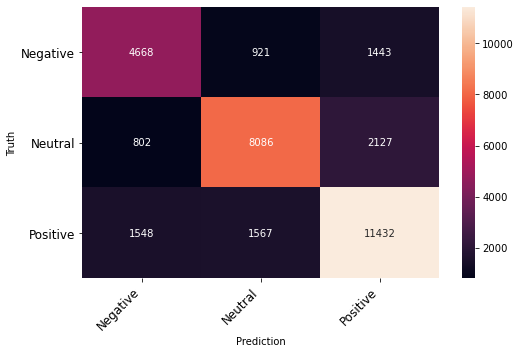

In [27]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,5), fontsize=12):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    
cm = confusion_matrix(y_test, y_pred)
print_confusion_matrix(cm,["Negative","Neutral", "Positive"])